# Blazars/Non-Blazars (AGNs) Samples Definition

### These notebook is to define the samples of sed data of blazars and non-blazar objects for future training of the neural network.

A list of name of sources is obtained for the blazar dataset (4627 from the OU4v2 catalog) and a list of ra dec for agns (4093 from the mqv7.2 catalog).

These lists will be given as input to the online SED Builder tool (ASI-SSDC) to get the files with the sed data.

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
print(sns.__version__)

import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import os

0.11.2
1.4.1
1.18.5


In [2]:
blcatalog = 'OU4Bl_v2.csv'
agncatalog = 'milliquasv7.2.txt'
dir_path = '/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder/Data/'

In [3]:
os.chdir(dir_path)
%ls

2whsp_nameNOTfound.txt          my2whsp_name.csv
3hsp.csv                        my3hsp_name.csv
agn_qrx_radec.csv               my3hsp_name_not_recognized.csv
agns_qrx_labelradec.csv         my3hsp_name_prova.csv
agns_quasR.csv                  mybl_list.csv
agns_quasR_prova.csv            new_milliquas.csv
agns_v72_qrx.csv                new_veron.csv
milliquasv6.4.csv               ou4bl3hsp_name.csv
milliquasv6.4_readme.txt        ou4bl3hsp_radec.csv
milliquasv7.2_readme.txt        ou4bl_labelradec.csv
milliquasv7.2.txt               OU4Bl_v1.csv
milliquasv7.4_agn_K.txt         OU4Bl_v2.csv
milliquasv7.4_agn_S1.txt        setAGnsNonBlazar.ipynb
milliquasv7.4_QSO_TYPE_1.txt    setBlazar.html
milliquasv7.4_Radio_galaxy.txt  setBlazar.ipynb
milliquasv7.4_readme.txt        veron_catalogue.txt
milliquasv7.4.txt


# Blazar sample

In [4]:
ou4bl = pd.read_csv(blcatalog, encoding='utf-8-sig')
ou4bl.sample(10)

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog
3901,3902,5BZBJ1423+3737,14 23 04.61,+37 37 30.5,46.0,7.040000e-12,0.0,0.000,5BZCAT
768,769,3HSPJ024751.6-225002.1,02 47 51.65,-22 50 02.11,3.3,0.000000e+00,17.1,0.550,3HSP
5655,5656,5BZBJ2225-1113,22 25 43.7,-11 13 40.58,314.0,2.580000e-12,0.0,0.997,5BZCAT
804,805,5BZQJ0257-1212,02 57 40.98,-12 12 01.4,218.0,3.610000e-12,0.0,1.391,5BZCAT
3640,3641,5BZQJ1335+4542,13 35 21.95,+45 42 38.19,251.0,0.000000e+00,0.0,2.452,5BZCAT
657,658,5BZQJ0222-3441,02 22 56.4,-34 41 28.71,683.0,2.110000e-12,0.0,1.490,5BZCAT
5759,5760,5BZBJ2251+4030,22 51 59.76,+40 30 58.21,92.0,1.080000e-11,0.0,0.229,5BZCAT
2832,2833,5BZQJ1108+4330,11 08 23.46,+43 30 53.71,300.0,0.000000e+00,0.0,1.226,5BZCAT
3152,3153,3FGLJ1207.6-2232,12 07 38.1,-22 32 50.99,59.3,3.490000e-12,0.0,0.000,Fermi 3LAC
268,269,3HSPJ005931.4-351049.1,00 59 31.45,-35 10 49.11,102.9,1.850000e-12,16.3,0.310,3HSP


In [5]:
# convert coordinates
def sex2deg(ra,dec):
    h,m,s = list(map(float,ra.split()))
    ra = s / 86400
    ra += m / 1440
    ra += h / 24
    ra *= 360
    
    d,m,s = dec.split()
    dec = float(s) / 3600
    dec += float(m) / 60
    if d[0] == '-':
        dec = float(d) - dec
    else:
        dec = float(d) + dec
    
    return ra,dec

In [6]:
RA_COL = 'R.A.'
DEC_COL = 'Dec'
def apply_df(df):
    try:
        bla = list(sex2deg(df[RA_COL],df[DEC_COL]))
    except:
        bla = [None,None]
    return bla

ou4bl[['RA','DEC']] = ou4bl.apply(apply_df, axis=1, result_type = 'expand')

In [7]:
ou4bl.head()

,id,Source name,R.A.,Dec,Radio flux d.,Fermi flux,Log nu_peak,Redshift,Original catalog,RA,DEC
0,1,3HSPJ000236.0-081532.4,00 02 36.06,-08 15 32.4,29.0,0.000000e+00,16.0,0.390,3HSP,0.650250,-8.259000
1,2,5BZBJ0002-0024,00 02 57.16,-00 24 47.01,178.0,0.000000e+00,0.0,0.523,5BZCAT,0.738167,-0.413058
2,3,4FGLJ0003.3-5905,00 03 13.32,-59 05 47.61,505.9,1.680000e-12,0.0,0.000,Fermi 4LAC,0.805500,-59.096558
3,4,4FGLJ0003.3-1928,00 03 18.66,-19 27 22.28,171.0,2.590000e-12,0.0,0.000,Fermi 4LAC,0.827750,-19.456189
4,5,5BZQJ0003+2129,00 03 19.32,+21 29 44.48,83.0,0.000000e+00,0.0,0.450,5BZCAT,0.830500,21.495689


In [8]:
ou4bl.columns

Index(['id', 'Source name', 'R.A.', 'Dec', 'Radio flux d.', 'Fermi flux',
       'Log nu_peak', 'Redshift', 'Original catalog', 'RA', 'DEC'],
      dtype='object')

In [9]:
# Description of the Blazars in the catalog
ou4bl.groupby('Original catalog').size().sort_values(ascending=False)

Original catalog
5BZCAT        3561
3HSP          1353
Fermi 4LAC     748
Fermi 3LAC     415
dtype: int64

In [10]:
# define the colums of interest
col = dict(idn='id',
           ra='RA',
           dec='DEC',
           name='Source name',
           redshift='Redshift',
           flux_radio='Radio flux d.',
           fermi_flux='Fermi flux',
           nupk='Log nu_peak',
           catalog='Original catalog'
          )

#### 4LAC, 3LAC data absent in SED Builder so I select only 5BZCAT and 3HSP

In [11]:
ou4bl_3HSP = ou4bl.loc[ou4bl[col['catalog']] == '3HSP']
ou4bl_3HSP = ou4bl_3HSP[list(col.values())]
ou4bl_5BZCAT = ou4bl.loc[ou4bl[col['catalog']] == '5BZCAT']
ou4bl_5BZCAT = ou4bl_5BZCAT[list(col.values())]
# join the two df in order to have my complete list of blazars
mybl_list = pd.concat([ou4bl_3HSP, ou4bl_5BZCAT], ignore_index=True)

In [ ]:
#mybl_list.to_csv("mybl_list.csv", encoding='utf-8-sig', index=False)

In [12]:
# Composition of the Blazars set
mybl_list.groupby(col['catalog']).size().sort_values(ascending=False)

Original catalog
5BZCAT    3561
3HSP      1353
dtype: int64

### Problemi con riconoscimento nomi 3HSP presenti nel catalogo OU4 sul SED Builder

#### Scarico direttamente il catalogo 3HSP e lo epuro dalle sorgenti già presenti nel 5BZcat


In [13]:
cat3hsp=pd.read_csv('3hsp.csv',encoding='utf-8-sig')

In [14]:
cat3hsp.head()

,id,3HSP Source name,BZcat name,R.A.,Dec,NVSS/FIRSTflux density(mJy),X-ray flux d. @ 1keV (μJy),Log(peak flux),γ-ray counterpart,Fermi γ-ray slope,2WHSP name
0,1,3HSPJ000116.4+293534,NaN,0.31821,29.59278,4.0,NaN,-12.9?,NaN,NaN,2WHSPJ000116.3+293534
1,2,3HSPJ000117.1-315043,NaN,0.32117,-31.84528,7.2,0.23,-12.3?,NaN,NaN,2WHSPJ000116.9-315043
2,3,3HSPJ000132.7-415525,NaN,0.38642,-41.92361,13.2,0.34,-11.7,4FGL J0001.6-4156,2.09,2WHSPJ000132.6-415524
3,4,3HSPJ000158.1-115047,NaN,0.49225,-11.84639,3.3,0.11,-12.5,NaN,NaN,2WHSPJ000158.0-115047
4,5,3HSPJ000215.2-672653,NaN,0.56329,-67.44806,21.4,0.27,-11.8,4FGL J0002.1-6728,1.95,2WHSPJ000215.1-672653


In [15]:
# seleziona righe del dataframe non presenti nel catalogo 5BZcat
my_3hsp = cat3hsp.loc[cat3hsp['BZcat name'].isnull()]
my_3hsp.shape

(1356, 11)

In [ ]:
name_my3hsp=my_3hsp['3HSP Source name']
name_my3hsp.to_csv('my3hsp_name.csv', encoding='utf-8-sig', index=False, header=None)

In [16]:
# il SED Builder non riconosce molti nomi 3HSP quando glieli passo come input
# passo al catalogo 2WHSP, togliendo le righe "NaN"

my_2whsp = my_3hsp.loc[my_3hsp['2WHSP name'].notnull()]
my_2whsp.shape

(1072, 11)

In [ ]:
# I 3HSP non BZcat erano 1356. Selezionando le sorgenti con nome 2WHSP scendiamo a 1072 sorgenti:
# perdiamo 284 blazars
whsp_name=my_2whsp['2WHSP name']
whsp_name.to_csv('my2whsp_name.csv', encoding='utf-8-sig', index=False, header=None)

#### In totale il mio data set per le Blazar da passare al SED Builder contiene 4633 sorgenti (3561 BZCAT + 1072 2WHSP)

# AGNs Sample

In [17]:
agns_v72 = pd.read_csv(agncatalog, encoding='utf-8-sig', delimiter = '|')
agns_v72.sample(10)

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
1245639,249.361097,45.796952,SDSS J163726.66+454748.9,BRX,16.78,18.96,pG,1,1,0.192,99,2RXS J163725.9+454746,VL0J163726.66+454748.9,FIRST J163726.6+454748,NaN
727898,165.653117,30.925764,SDSS J110236.74+305532.7,Q,20.55,20.97,gG,-,-,3.308,,,,,NaN
925054,196.159334,-28.771601,WISEA J130438.28-284617.3,q,18.33,19.06,p+G,1,-,1.500,100,,,,NaN
1400164,325.743611,-36.152644,WISEA J214258.45-360909.3,q,20.15,20.99,jG,1,1,2.200,98,,,,NaN
449390,119.671123,44.401865,SDSS J075841.07+442406.6,Q,19.06,19.05,gG,1,-,1.802,,,,,NaN
815196,179.502316,57.989127,SDSS J115800.55+575920.8,Q,20.98,21.03,g,-,-,2.392,,,,,NaN
175966,27.271005,3.797878,SDSS J014905.03+034752.4,Q,19.76,20.58,pmG,-,-,1.644,,,,,NaN
621256,148.976532,41.934527,SDSS J095554.36+415604.3,Q,20.88,21.18,gG,-,1,1.339,,,,,NaN
273404,46.982762,12.696715,WISEA J030755.85+124148.1,q,18.75,20.14,pmG,-,-,1.200,98,,,,NaN
1126104,227.093508,43.368746,SDSS J150822.44+432207.4,Q,21.59,21.76,g,-,-,1.524,,,,,NaN


In [18]:
agns_v72.columns

Index(['RAJ2000', 'DEJ2000', 'Name', 'Type', 'Rmag', 'Bmag', 'Comment', 'R',
       'B', 'z', 'Qpct', 'XName', 'RName', 'Lobe1', 'Lobe2'],
      dtype='object')

In [19]:
agns_v72.groupby('Type').size().sort_values(ascending=False)

Type
Q       707379
q       478297
X        83737
R        52371
QX       50952
qX       46025
qR       29917
N        25773
QR       24446
A        24114
AX        8100
K         4522
AR        4421
NR        4117
QRX       4093
2         3928
QR2       2150
qRX       2100
RX        1870
NX        1843
ARX       1831
R2        1786
qR2       1785
BRX       1658
q2         972
QR2X       877
BR         781
Q2         715
NRX        635
KX         524
qR2X       248
KR         174
NR2        165
Q2X        164
AR2X       150
AR2        145
R2X        142
N2         133
BX         106
2X          90
A2          87
q2X         80
BR2X        68
B           51
L           50
KRX         49
NR2X        43
A2X         42
BR2         27
KR2         18
K2          18
N2X         17
LX          10
B2X          8
KR2X         6
K2X          5
B2           5
LRX          3
LR           1
dtype: int64

In [20]:
# seleziono il tipo "QRX" cioè QSO type-I broad-line core-dominated con associazione Radio e X (4093)
agns_qrx = agns_v72.loc[agns_v72['Type'].str.strip() == 'QRX']
agns_qrx.head()

,RAJ2000,DEJ2000,Name,Type,Rmag,Bmag,Comment,R,B,z,Qpct,XName,RName,Lobe1,Lobe2
1343,0.212906,11.236500,SDSS J000051.09+111411.2,QRX,17.16,17.99,pG,-,-,0.865,99,2RXS J000051.2+111422,FIRST J000051.0+111411,VL0J000051.07+111411.6,NaN
1520,0.240825,29.710146,SDSS J000057.79+294236.4,QRX,20.10,20.11,gG,-,-,0.760,100,2RXS J000058.1+294227,VL0J000057.78+294236.5,NVSS J000058.1+294237,2RXP J000058.5+294234
1787,0.285889,19.242694,TEX 2358+189,QRX,20.50,21.19,j,1,1,3.100,100,2SXPS J000108.5+191431,VL0J000108.62+191434.1,NVSS J000108.6+191434,NaN
2071,0.330319,19.429377,SDSS J000119.28+192545.7,QRX,19.97,20.61,gG,-,1,1.253,98,2SXPS J000119.2+192541,NVSS J000119.2+192548,,NaN
2227,0.353409,8.890468,SDSS J000124.81+085325.7,QRX,19.13,18.93,jG,-,-,1.051,99,2RXS J000124.9+085320,FIRST J000124.8+085325,NVSS J000124.8+085325,NaN


In [21]:
# seleziono le coordinate per fare il RUN con il SED Builder (i nomi non li riconosce)
agns_qrx_radec = agns_qrx[['RAJ2000','DEJ2000']]
agns_qrx_radec.shape

(4093, 2)

In [ ]:
# salvo in .csv 4093 AGNS
agns_qrx_radec.to_csv('agn_qrx_radec.csv', header=None, index=False)

# Preprocessing of the SED data file obteined with SED Builder

At this point, the SED of each object (providing one) is obtained with the `SEd-Builder Tool`(SSDC-ASI). I buildt a python script to automatically access the online tool via the browser, load the lists with the names of the sources and submit the request to obtain the files with the data.
For the  `Blazars ` I used the `BZCAT + 2WHSP` list of name (the data are in the folders  `./sedData_bzcat_name/` and  `./sedData_2whsp_name/`) and for the  `AGNs` I used the  `mqv7.2 QRX`list of ra-dec (the data are in the folder `./agns/`)

In [22]:
#funzione per creare una lista con i nomi dei file da analizzare

def list_files_recursive(path):
    """
    Function that receives as a parameter a directory path
    :return list_: File List and Its Absolute Paths
    """
    import os
    files = []
    # r = root, d = directories, f = files
    for r, d, f in os.walk(path):
          for file in f:
                if '.zip' in file:
                    continue
                files.append(os.path.join(r, file))
                
    return files

In [23]:
dir_agn = 'agns/'
dir_bzcat = 'sedData_bzcat_name/'
dir_2whsp = 'sedData_2whsp_name/'
print(os.getcwd())

/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder/Data


In [29]:
cd /home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder

/home/elenagasparri/Documenti/Fisica/esame_cmepda/SED_Builder


In [30]:
cur_dir = os.getcwd()
%ls

 5BZCAT.csv*
 agn_name.csv
 agns/
 AGNs.csv
 agns_mqv7.2_name/
 agns_mqv7.2_radec_qrx/
 bzcat_catalougue_ssdc.csv
 bzcat_name.csv
 carlos_AGNSample_AllColumns_clean.csv
 Check_run_VOUB.ipynb
 Data/
 geckodriver.log
 newfile.txt
 nn_data_v2.npz
 nn_data_v3.npz
 nn_data_voub.npz
 preparationSED_BUILDERdata.ipynb
 preparation_sedData_BinningHist.ipynb
 preparation_sedData_final_version.ipynb
 preparation_sedData_final_version-v2.ipynb
 preparation_sedData_final_version-v3-Copy1.ipynb
 preparation_sedData_final_version-v3.ipynb
 preparation_sedData.ipynb
 preparationVOUBdata.ipynb
 __pycache__/
 result_bzcat.txt
 run_sedbuilder_batch.sh*
 run_sedbuilder.py
 run_sedbuilder_selenium_command.py
 run_sedbuilder_selenium_final.py
 sedData_2whsp_name/
 sedData_bzcat_name/
'SED with no data'/
 VOUB_AGNCarlos/
 VOUB_BlazarCarlos/
 VOUB_blazarE/


In [31]:
# List of sed file for agn and blazar from VOUB
path_bzcat = os.path.join(cur_dir, dir_bzcat)
sed_bzcat = list_files_recursive(path_bzcat)
path_2whsp = os.path.join(cur_dir, dir_2whsp)
sed_2whsp = list_files_recursive(path_2whsp)

path_agn = os.path.join(cur_dir, dir_agn)
sed_agns = list_files_recursive(path_agn)

In [32]:
# le blazar bzcat in lista sono 3560 e non 3561 perché a catalogo compare due volte la sorgente 5BZBJ1701+3954 (cartella_56)
# le coordinate riportate sono leggermente diverse ma anche lo sky_explorer le identifica come medesima sorgente
len(sed_bzcat)

3560

In [33]:
# sono 1067 perché 5 sorgenti 2whsp non sono state risolte da sed builder:
# Name not found in file_1: ?2WHSPJ000116.3+293534
# Name not found in file_2: 2WHSPJ013309.4-453524
# Name not found in file_10: 2WHSPJ111603.5+371036
# Name not found in file_13: 2WHSPJ135340.2-663958
# Name not found in file_19: 2WHSPJ200054.0-364226
len(sed_2whsp)

1067

In [34]:
#Concateno liste 'sed_bzcat' e 'sed_2whsp' a creare una unica lista files blazars
sed_blazars = sed_bzcat + sed_2whsp
len(sed_blazars)

4627

In [35]:
# Dovevano essere 4093 (probabilmente 5 sorgenti hanno coordinate molto simili e il sed builder non risolve)
len(sed_agns)

4059

### Filtraggio file frequenza - flusso per rete neurale:  se più entry hanno stessa frequenza teniamo la entry con flusso maggiore

In [36]:
# Pulizia file sed Blazars

ul_blazars = 0
bad_words = ['; UPPER LIMIT','NAN', 'nan','NaN']

freq_all_bl=[]
flux_all_bl=[]
seddata_all_bl= []
point_sed_bl =[]

for file in sed_blazars:
    # tolgo dal file le misure Upper limit e eventuali NAN
    with open(file) as oldfile, open('newfile.txt', 'w') as newfile:
        for line in oldfile:
            if not any(bad_word in line for bad_word in bad_words):
                newfile.write(line)
            else:
                ul_blazars += 1
    freq_opt = []                        # vettori fequenza flusso che non contengono upper limit e misure ripetute
    flux_opt = []
    freq, flux = np.loadtxt('newfile.txt', usecols=(0, 2), unpack=True)
    try:
        #tolgo eventuali punti molto alti in flusso
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-6 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # se le frequenze sono ripetute, tengo la misura a flusso più alto
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq[i])                       # Nel caso ci sia una misura sola di flusso
        flux_opt= np.append(flux_opt,flux[i])                       # non da errore ma appende semplicemente valore
    
    # Costruisco array di interesse
    freq_all_bl = np.append(freq_all_bl,freq_opt)                   # array 1-D con tutte le frequenze
    flux_all_bl = np.append(flux_all_bl,flux_opt)                   # array 1-D con tutti i flussi
    freq_points_bl = np.unique(freq_all_bl)                         # array 1-D con solo le frequenze diverse presenti nel set blazars
    freq_points_bl_ord = freq_points_bl[freq_points_bl.argsort()]   # array freq_points ordinato
    seddata_all_bl.append((freq_opt,flux_opt))                      # tupla flux_all[i][j][k], i = source, j=0 or 1 freq or
                                                                    # flux measure, [k] = k-riga dell'array
    point_sed_bl = np.append(point_sed_bl,len(freq_opt))            # array con numero di punti per sed

In [37]:
print('Il numero di frequenze diverse nel dataset blazar è ',freq_points_bl.shape)
print('Il numero di input vector per le blazars è ',len(seddata_all_bl))
print('Gli Upper limit nelle SED per le Blazars sono: ',ul_blazars)

Il numero di frequenze diverse nel dataset blazar è  (527,)
Il numero di input vector per le blazars è  4627
Gli Upper limit nelle SED per le Blazars sono:  14247


In [38]:
# Pulizia file sed Agn
ul_agns = 0
bad_words = ['; UPPER LIMIT','NAN', 'nan','NaN']

freq_all_agn=[]
flux_all_agn=[]
seddata_all_agn= []
point_sed_agn =[]

for file in sed_agns:
    # tolgo dal file le misure Upper limit
    with open(file) as oldfile, open('newfile.txt', 'w') as newfile:
        for line in oldfile:
            if not any(bad_word in line for bad_word in bad_words):
                newfile.write(line)
            else:
                ul_agns += 1
    freq_opt = [] # vettori fequenza flusso che non contengono upper limit e misure ripetute
    flux_opt = []
    freq = []
    freq, flux = np.loadtxt('newfile.txt', usecols=(0, 2), unpack=True)
    try:
        #tolgo eventuali punti molto alti in flusso
        strange_flux_index = [i for i in range(len(freq)) if flux[i]>= 1e-6 or flux[i]<0]
        freq = np.delete(freq,strange_flux_index)
        flux = np.delete(flux,strange_flux_index)
        # se le frequenze sono ripetute, tengo la misura a flusso più alto
        for i in range(len(freq)):
            if np.size(np.where(freq_opt == freq[i]))>0:
                if flux[i] > flux_opt[np.where(freq_opt == freq[i])]:
                    flux_opt[np.where(freq_opt == freq[i])]=flux[i]
            else:
                freq_opt= np.append(freq_opt,freq[i])
                flux_opt= np.append(flux_opt,flux[i])
    except TypeError:
        freq_opt= np.append(freq_opt,freq)                       # Nel caso ci sia una misura sola di flusso
        flux_opt= np.append(flux_opt,flux)                       # non da errore ma appende semplicemente valore
    
    # Costruisco array di interesse
    freq_all_agn = np.append(freq_all_agn,freq_opt)                    # array 1-D con tutte le frequenze
    flux_all_agn = np.append(flux_all_agn,flux_opt)                    # array 1-D con tutti i flussi
    freq_points_agn = np.unique(freq_all_agn)                          # array 1-D con solo le frequenze diverse presenti nel set agns
    freq_points_agn_ord = freq_points_agn[freq_points_agn.argsort()]   # array freq_points ordinato
    seddata_all_agn.append((freq_opt,flux_opt))                        # tupla seddata_all_agn[i][j][k], [i] = source, j=0 or 1 freq or
                                                                       # flux measure, [k] = k-riga dell'array
    point_sed_agn = np.append(point_sed_agn,len(freq_opt))             # array con numero di punti per sed

In [39]:
print('Il numero di frequenze diverse nel dataset AGNs è ',freq_points_agn.shape)
print('Il numero di input vector per gli AGNs è ',len(seddata_all_agn))
print(print('Gli Upper limit nelle SED per gli AGNs sono: ',ul_agns))

Il numero di frequenze diverse nel dataset AGNs è  (216,)
Il numero di input vector per gli AGNs è  4059
Gli Upper limit nelle SED per gli AGNs sono:  6473
None


# Generation of the dataset for the Neural Network

In [40]:
# Genero 'nn_freq_data' un vettore ordinato che contenga tutti i valori di frequenze diverse che compaiono nei due
# data set blazars e agns per creare gli array di lunghezza identica da dare in pasto alla rete neurale
tot_freq = np.append(freq_points_bl_ord,freq_points_agn_ord)
tot_freq_un = np.unique(tot_freq)
nn_freq_data = tot_freq_un[tot_freq_un.argsort()]

nn_freq_data.shape

(529,)

In [41]:
def GenerateDataSet(nn_frequencies, sed_values):
    """
    Una funzione che dato un array di frequenze ordinato, genera una array con shape (N,2) dove i valori di flusso
    sono disposti nella giusta posizione rispetto alla frequenza associata (assegna zero ai flussi non misurati).
    Nella seconda colonna abbiamo un flag a 1 per dati presenti nel file della sed.
    
    nn_frequencies = numpy array ordinato con tutte le frequenze diverse presenti nei data set blazar + agns
    sed_values = tupla che contiene tutti i dati sed (blazars o agn) [i]= sources, [j]= 0 (freq), 1(flux), [k]=k-riga dell'array
    
    """
    data = []
    for x in sed_values:
        temp = np.zeros((nn_frequencies.shape[0],2)) #np.zeros(freq_points.shape)
        for i in range(len(x[0])):
            idx = np.where(nn_frequencies == x[0][i])
            temp[idx,0] = x[1][i]                 # temp[idx] = x[1][i]
            temp[idx,1]=1                        # flag a 1 per presenza dati nella sed
        data.append(temp)
    return np.array(data)

In [42]:
# n-D array di numpy con i dati delle blazars per la rete neurale
bl_data = GenerateDataSet(nn_freq_data, seddata_all_bl)

bl_data.shape

(4627, 529, 2)

In [43]:
# n-D array di numpy con i dati degli AGN non-blazazar per la rete neurale
agn_data = GenerateDataSet(nn_freq_data, seddata_all_agn)

agn_data.shape

(4059, 529, 2)

In [ ]:
# Salvo i due numpy.ndarray dei dati blazar e agn e l'array con le frequenze ordinate, nel file nn_data.npz
# che userò nella rete neurale
#np.savez('nn_data_voub.npz',bl_data = bl_data, agn_data = agn_data, nn_freq_data = nn_freq_data)
#np.savez('nn_data_v3.npz',bl_data = bl_data, agn_data = agn_data, nn_freq_data = nn_freq_data)

# Some Plot of data

In [44]:
# Histogram of the number of sources per amount of data points in the SED
#plt.style.use('seaborn-white')
def histData(points_bl, points_agn):
    ''' Histogram of the amount of data points per SED file
    -----------
        points_bl = numpy array like points_per_sed of Blazars sources
        points_agn = numpy array like points_per_sed of AGN sources
    '''
    plt.figure()
    plt.title('Number of sources per amount of data points in the SED')
    plt.xlabel('Points per SED')
    plt.ylabel('Numbers of sources')
    plt.grid(True)
    bins = np.logspace(0, 3, 50)
    plt.xscale('log')

    n, bins, patches=plt.hist(points_bl, bins=bins, alpha=1.0, histtype='step', label='Blazars')
    n_1, bins_1, patches_1=plt.hist(points_agn, bins=bins, alpha=1.0, histtype='step', label=f'AGNs')
    plt.legend(loc='upper right')
    plt.show()

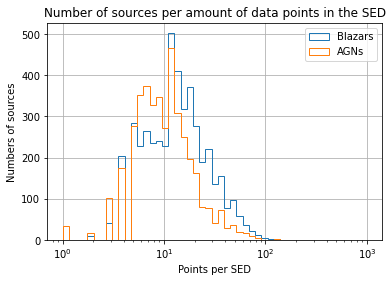

In [45]:
#plot of SED Builder data
histData(point_sed_bl,point_sed_agn)

In [46]:
# plotto le SED sovraposte di tutti i file per vedere come sono distribuiti i punti
def sedDistribution(sed_data_all,mode):
    ''' Plot of the SED files
    -------------
        sed_data_all = tupla con i dati completi freq e flux like seddata_all_***
        mode = boolean , 'True' stands for blazar and 'False' for AGNs
    '''
    plt.figure()
    if mode:
        plt.title('Superimposed Plot of the SED of the entire Blazars dataset')
    else:
        plt.title('Superimposed Plot of the SED of the entire AGNs dataset')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(True)
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        plt.loglog(freq, flux, 'b.', markersize=1)
    plt.show()

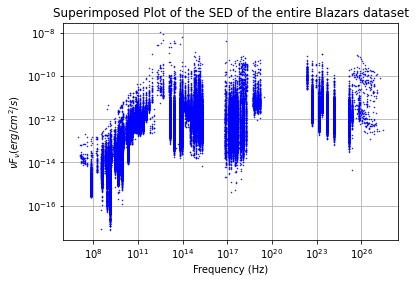

In [47]:
sedDistribution(seddata_all_bl,True)

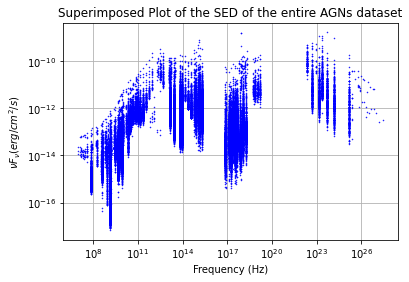

In [48]:
sedDistribution(seddata_all_agn, False)

In [49]:
#Scatter plot of the SED files with color map for the recurrent point

def sedColormapPlot(sed_data_all,mode):
    ''' Scatter plot of the SED files with color map for the recurrent point
    -------------
        sed_data_all = tupla con i dati completi freq e flux like seddata_all_***
        mode = boolean , 'True' stands for blazar and 'False' for AGNs
    '''
    dens = np.zeros((1,3))
    for sed in sed_data_all:
        freq= sed[0]
        flux= sed[1]
        # Con l'ndarray dens conto quante volte in totale ho una stessa misura di freq/flusso
        # La terza colonna dell'array ci dice il numero di volte che è ripetuta la misura nell'intero dataset
        for i in range(len(freq)):
            if np.size(np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0]) > 0:
                dens[np.where(np.logical_and(dens[:,0] == freq[i], dens[:,1] == flux[i]))[0],2] += 1
            else:
                dens = np.vstack([dens,[freq[i],flux[i],1]])
    densn = np.delete(dens,(0),axis=0)                              #tolgo la prima riga di zeri
    
    plt.figure()
    fig,ax = plt.subplots()
    if mode:
        fig.suptitle('Density plots of the SEDs of Blazars data set')
    else:
        fig.suptitle('Density plots of the SEDs of AGNs data set')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    ax.grid(False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    im = ax.scatter(densn[:,0],densn[:,1], c = densn[:,2], cmap ='viridis',marker='.', alpha=0.5)
    fig.colorbar(im, ax=ax)
    plt.show()

<Figure size 432x288 with 0 Axes>

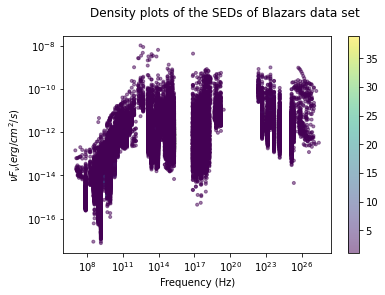

In [50]:
#plot of SED Builder data
sedColormapPlot(seddata_all_bl,True)

<Figure size 432x288 with 0 Axes>

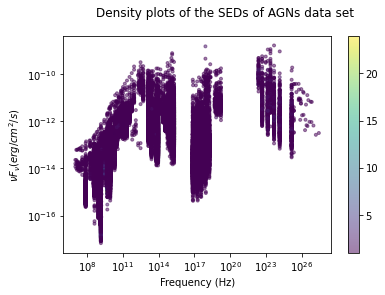

In [51]:
#Plot of SED Builder Data
sedColormapPlot(seddata_all_agn, False)

In [52]:
# Hist2D of the SEDs in our blazars data set
# freq_all e flux_all sono array con tutte le coppie di dati del dataset anche ripetute
def hist2dSed(freq_all,flux_all,mode):
    '''Hist2D of the SEDs of the entire data set.
    ------------
            freq_all,flux_all = 1D-array with all couple of data of type Blazar or AGNs
            mode = boolean, 'True' for Blazars data and 'False' for AGNs data
    '''
    plt.figure()
    if mode:
        plt.title('2D Histogram of the SEDs of Blazars data set')
    else:
        plt.title('2D Histogram of the SEDs of AGNs data set')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel(r'$\nu F_{\nu} (erg/cm^2/s)$')
    plt.grid(False)

    plt.xscale('log')
    plt.yscale('log')

    x_bins = np.logspace(6, 27,200)
    y_bins = np.logspace(-20,-7,200)
    #plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =10, cmap = 'BuPu')
    plt.hist2d(freq_all,flux_all, bins=[x_bins,y_bins], vmin =-10, cmap = 'twilight')
    cb = plt.colorbar()
    cb.set_label('counts in bin')
    plt.show()

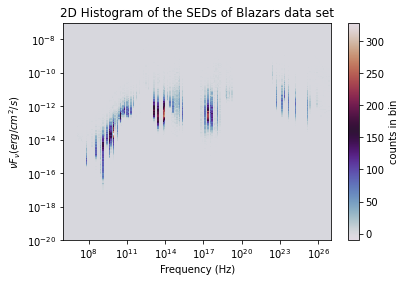

In [53]:
hist2dSed(freq_all_bl,flux_all_bl,True)

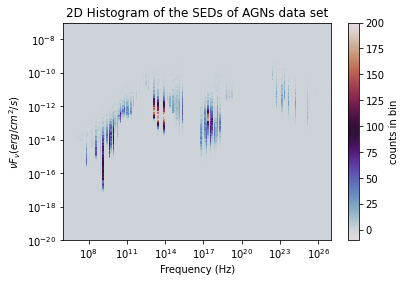

In [54]:
hist2dSed(freq_all_agn,flux_all_agn,False)